# Demo 2

> Test Fast.ai models with a simple supervised learning test


In [1]:
#| default_exp demo.demo2

In [2]:
#| hide
from nbdev.showdoc import *

%matplotlib inline
from fastai.vision.all import *
from fastai.data.all import *
import torch.nn.functional as F

from Noise2Model.core import *

from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

In [3]:
bs, size = 4, 512
# arch = models.resnet34
path = Path('../_data/Confocal_BPAE_B/')
path_train_raw = Path(path/"raw")
path_train_gt = Path(path/"gt")

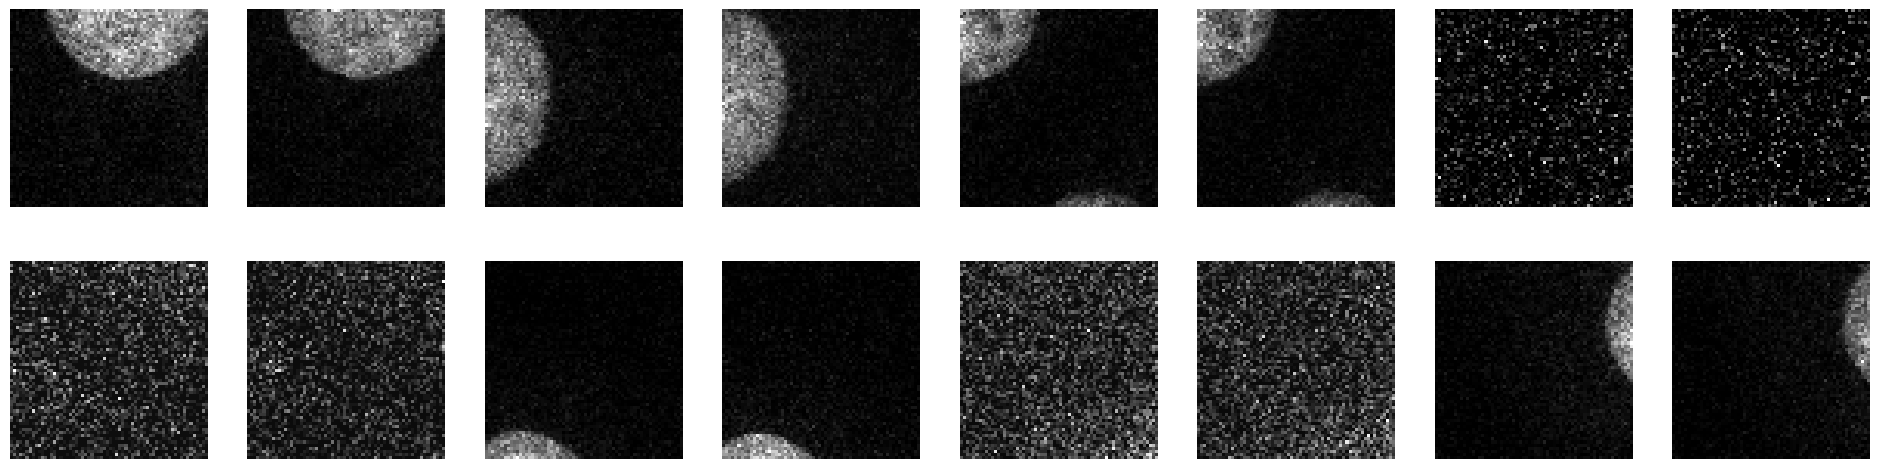

In [4]:
dblock = DataBlock(blocks    = (ImageBlock(cls=PILImageBW), ImageBlock(cls=PILImageBW)),
                   get_items = get_image_files, 
                   get_y = get_noisy_pair,
                   splitter  = RandomSplitter(valid_pct=0.2),
                   item_tfms = RandomCrop(64),
                   )
# dblock.summary(path_train_raw)
# dsets = dblock.datasets(path_train_raw)
# dsets.train[0]
dls = dblock.dataloaders(path_train_raw)
dls.show_batch(max_n=8, cmap='gray')

In [60]:
learn = unet_learner(dls, models.googlenet, loss_func=F.l1_loss, n_in=1, n_out=1, pretrained=True, cut=None)
learn.summary()

DynamicUnet (Input shape: 64 x 1 x 64 x 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 32 x 32   
Conv2d                                    3136       False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     64 x 64 x 16 x 16   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     64 x 192 x 16 x 16  
Conv2d                                    110592     False     
BatchNorm2d                               384        True      
____________________________________________________________________________
                     64 x 192 x 8 x 8    
MaxPool2d                                    

SuggestedLRs(valley=7.585775892948732e-05)

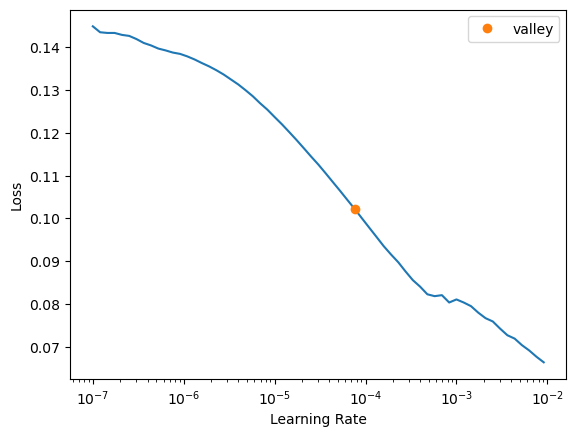

In [61]:
learn.lr_find()

In [63]:
# learn.fit_one_cycle(10, lr_max=1e-03)
learn.fine_tune(10,1e-02) 

epoch,train_loss,valid_loss,time
0,0.014220,0.017189,00:09
1,0.014416,0.020150,00:09
2,0.014933,0.014671,00:09
3,0.014273,0.015767,00:09
4,0.014041,0.014765,00:09
5,0.013710,0.014383,00:09
6,0.013568,0.014504,00:09
7,0.013486,0.014469,00:09
8,0.013298,0.014303,00:09
9,0.013224,0.014321,00:09


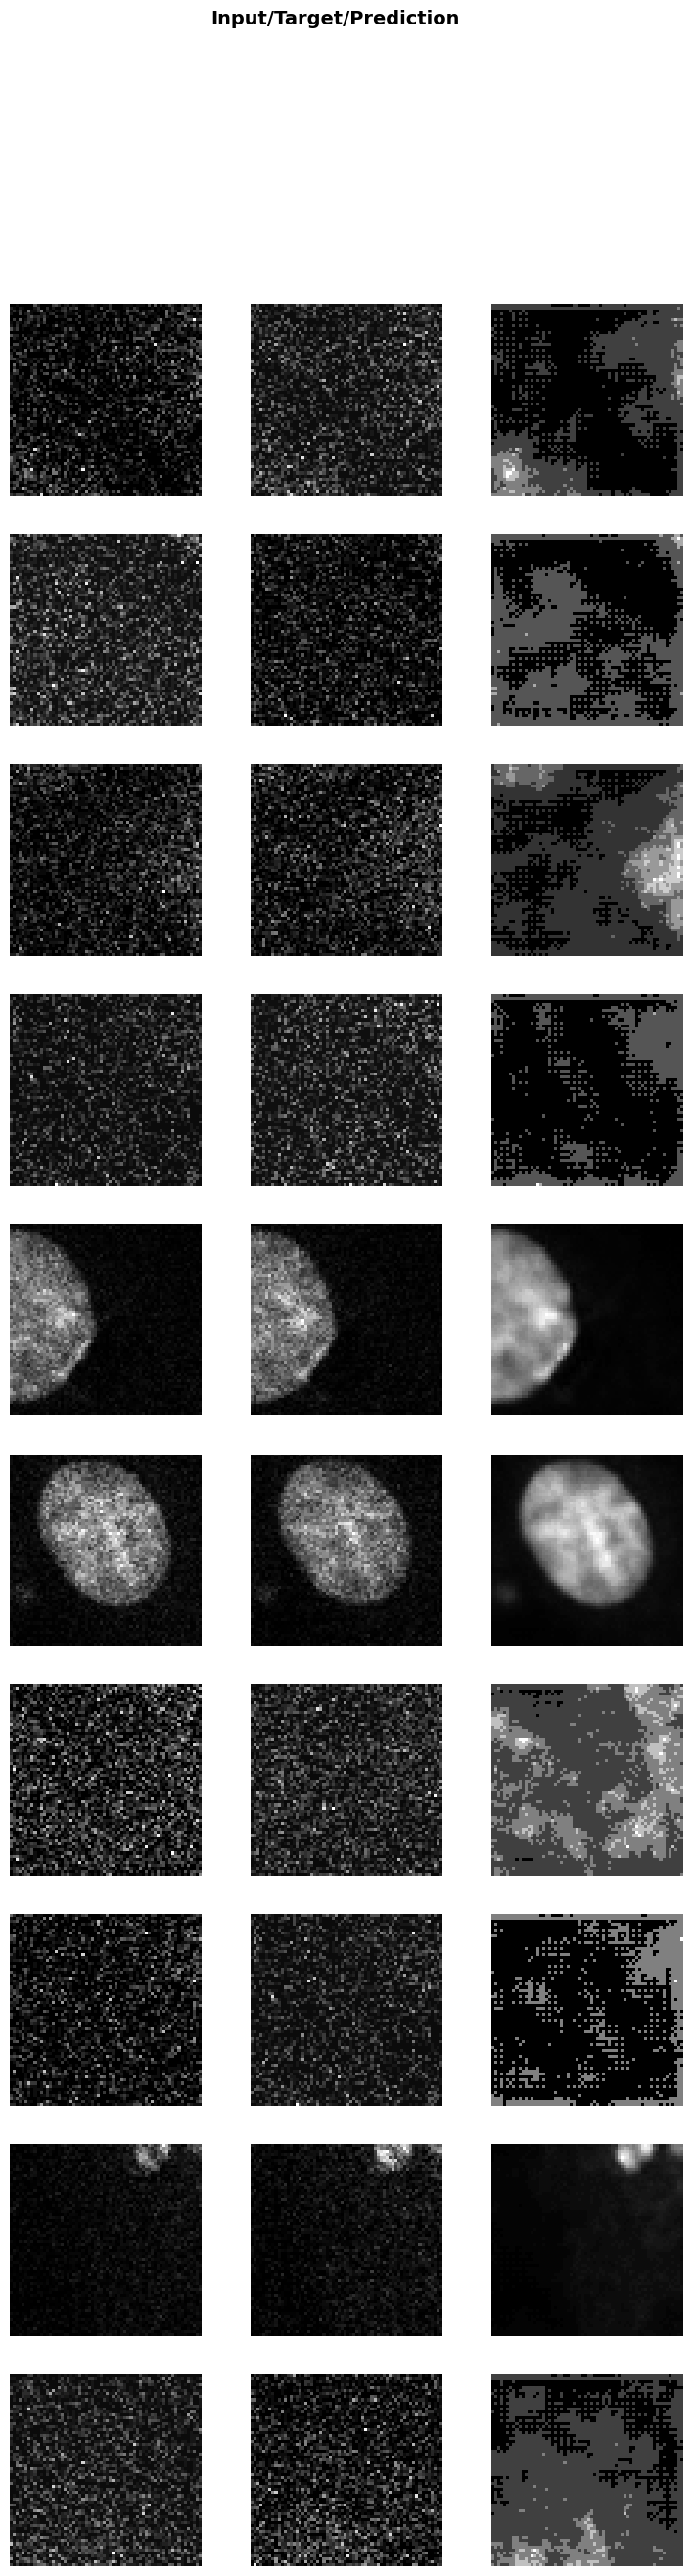

In [67]:
learn.show_results(max_n=10, cmap='gray')

In [65]:
#| hide
import nbdev; nbdev.nbdev_export()